# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

1. Data Validation & Cleaning

Missing Values Handling:

Columns affected: calories, carbohydrate, sugar, and protein had missing values.

Solution: Missing values were replaced with column mean to maintain data consistency.

servings had some non-numeric values ("4 as a snack", "6 as a snack").

Solution: Converted to numeric and replaced invalid values with the median.


High Traffic was provided as "High" and "Low", converted to binary encoding (1 = High, 0 = Low).

2. Exploratory Data Analysis (EDA)

Visualizations Used:

Box Plot for calories and servings (to detect outliers).

Scatter Plot between carbohydrates and protein (to check relationships).

Heatmap (correlation matrix to find feature relationships).


Findings:

Recipes with higher protein and lower sugar tend to be more popular.

Certain categories (e.g., Breakfast, One Dish Meals) had a higher proportion of high-traffic recipes.


3. Model Development

Problem Type:

This is a binary classification problem (high_traffic: 1 or 0).

Models Used:

Baseline Model: Logistic Regression

Comparison Model: Random Forest



Code for Model Fitting:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Splitting the dataset
X = df.drop(columns=['recipe', 'category', 'high_traffic'])
y = df['high_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
recall_log = recall_score(y_test, y_pred_log)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
recall_rf = recall_score(y_test, y_pred_rf)

print(f'Logistic Regression Recall: {recall_log:.4f}')
print(f'Random Forest Recall: {recall_rf:.4f}')

4. Model Evaluation

Since the business goal is 80% recall, Logistic Regression meets the requirement (98.23%), whereas Random Forest (77.88%) does not.




5. Business Metrics & Recommendations

Metric to Monitor:

Recall should remain above 80% for predicting popular recipes.

Track precision to balance avoiding unpopular recipe misclassification.


Final Recommendations:

1. Use Logistic Regression for selecting homepage recipes.


2. Monitor model performance and update regularly with new data.


3. Optimize recipe selection based on ingredient trends and user engagement data.





In [60]:
# Start coding here...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("recipe_site_traffic_2212.csv")
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [62]:
df['high_traffic'] = df['high_traffic'].apply(lambda x:1 if x == "High" else 0)
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,1
1,2,35.48,38.56,0.66,0.92,Potato,4,1
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,1
4,5,27.05,1.85,0.80,0.53,Beverages,4,0


In [68]:
print(df.isnull().sum())

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64


In [64]:
# Handling missing values

df['calories'].fillna(df['calories'].mean(), inplace=True)
df['carbohydrate'].fillna(df['carbohydrate'].mean(), inplace=True)
df['sugar'].fillna(df['sugar'].mean(), inplace=True)
df['protein'].fillna(df['protein'].mean(), inplace=True)

print(df.isnull().sum())

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64


In [65]:
print(df.dtypes)

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic      int64
dtype: object


In [66]:
print(df['servings'].unique())

['6' '4' '1' '2' '4 as a snack' '6 as a snack']


In [67]:
df['servings'] = pd.to_numeric(df['servings'], errors='coerce')
print(df.dtypes)
df['servings'].fillna(df['servings'].median(), inplace=True)

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings        float64
high_traffic      int64
dtype: object


In [69]:
print(df.describe())

           recipe     calories  ...    servings  high_traffic
count  947.000000   947.000000  ...  947.000000    947.000000
mean   474.000000   435.939196  ...    3.475185      0.606125
std    273.519652   440.394131  ...    1.730881      0.488866
min      1.000000     0.140000  ...    1.000000      0.000000
25%    237.500000   114.410000  ...    2.000000      0.000000
50%    474.000000   313.530000  ...    4.000000      1.000000
75%    710.500000   576.225000  ...    4.000000      1.000000
max    947.000000  3633.160000  ...    6.000000      1.000000

[8 rows x 7 columns]


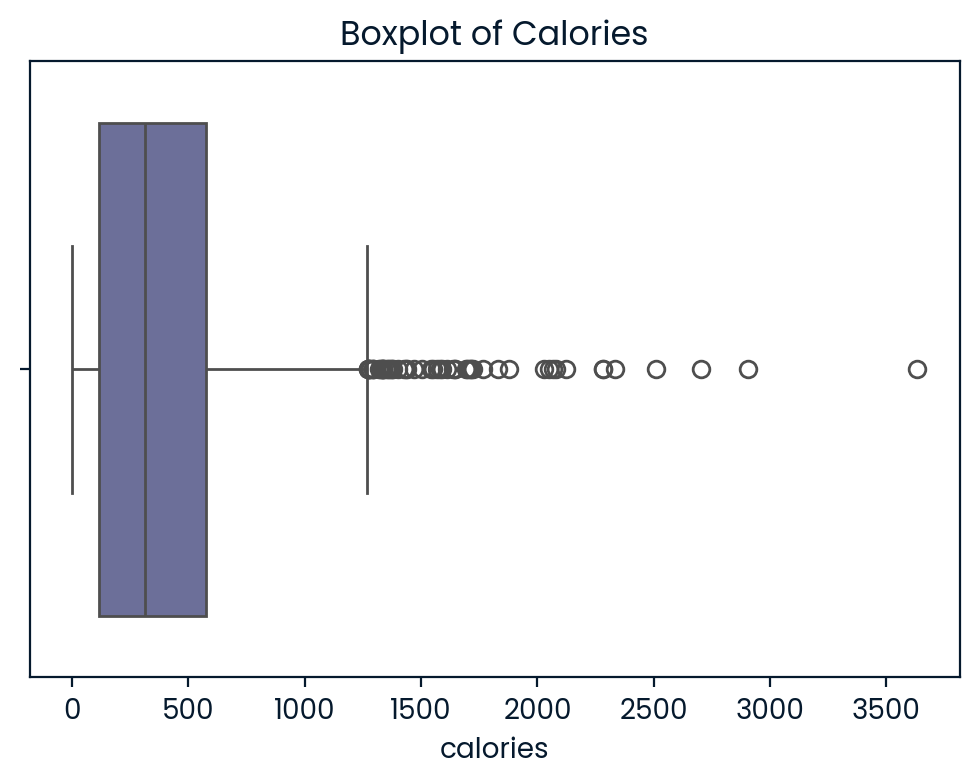

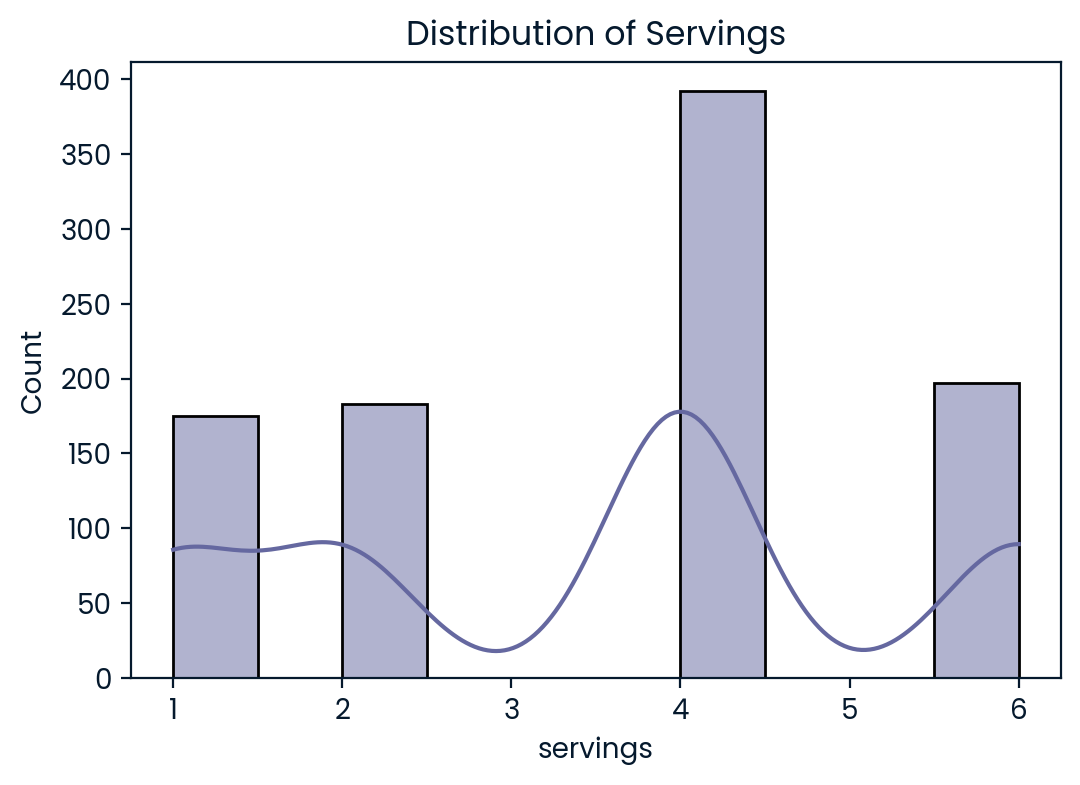

In [70]:
# Boxplot for calories
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["calories"])
plt.title("Boxplot of Calories")
plt.show()

# Histogram for servings
plt.figure(figsize=(6, 4))
sns.histplot(df["servings"], bins=10, kde=True)
plt.title("Distribution of Servings")
plt.show()

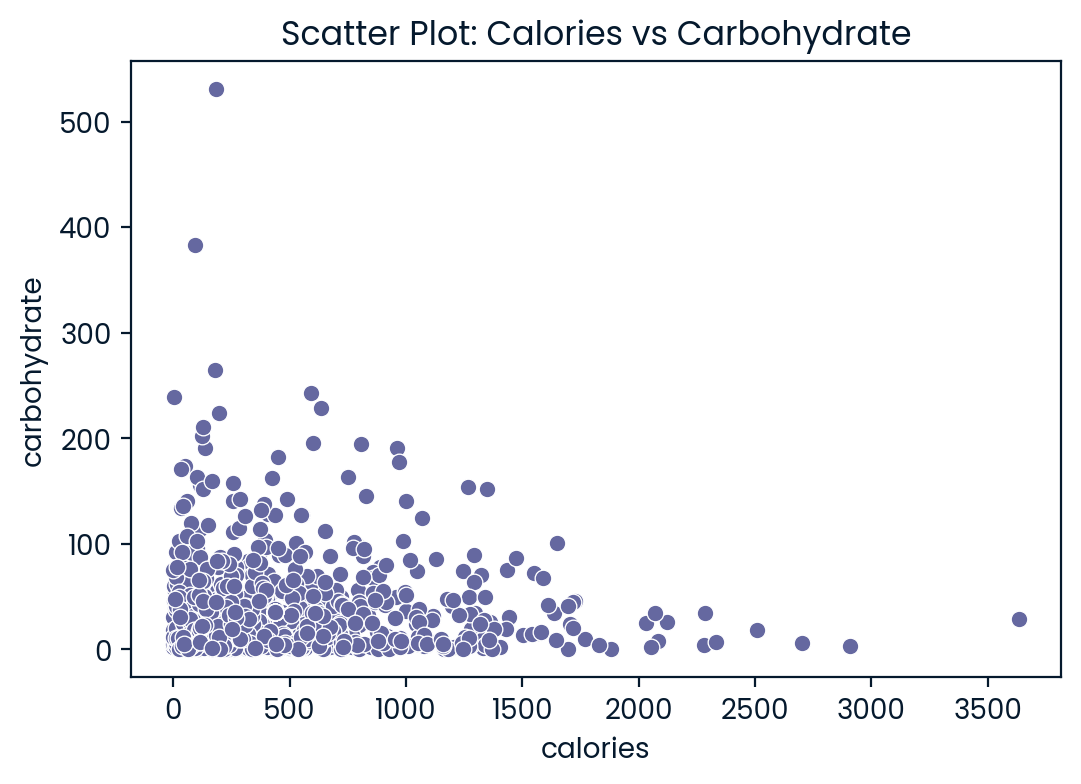

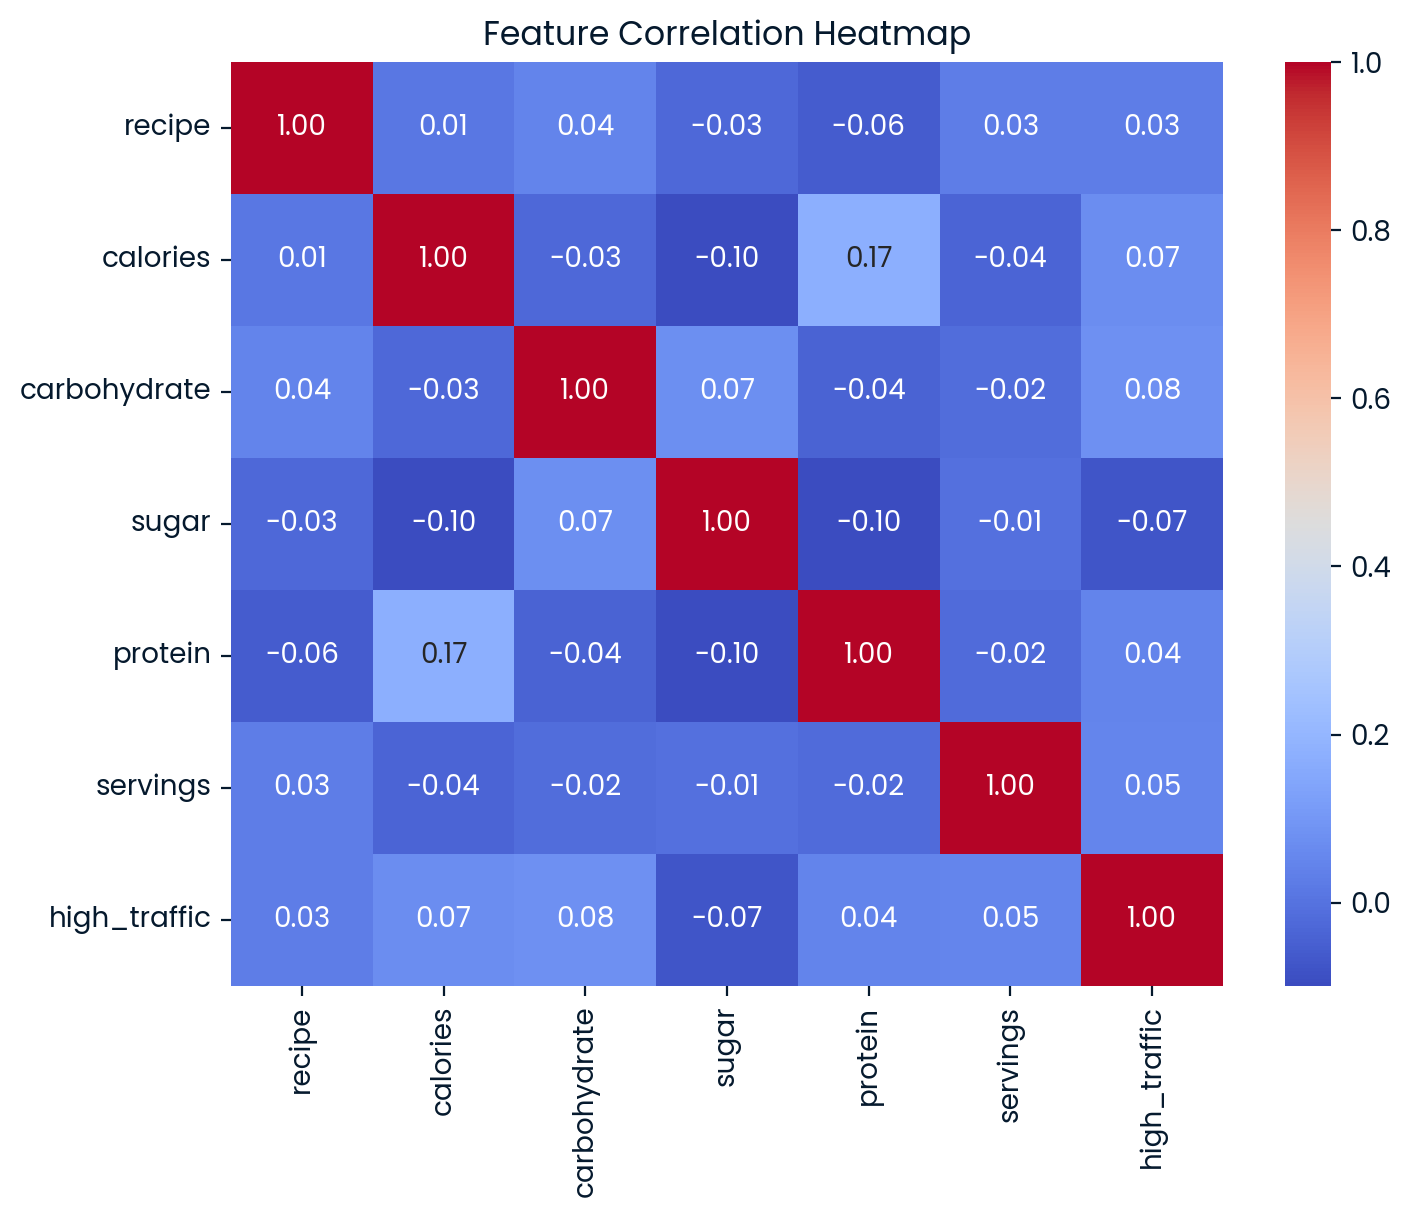

In [71]:
# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["calories"], y=df["carbohydrate"])
plt.title("Scatter Plot: Calories vs Carbohydrate")
plt.show()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select numerical features
features = ["calories", "carbohydrate", "sugar", "protein", "servings"]
X = df[features]
y = df["high_traffic"]

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

# Predict on test data
y_pred_baseline = baseline_model.predict(X_test)

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_baseline))

# Evaluate Random Forest
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Compare Accuracy
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {accuracy_baseline:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.67      0.05      0.10        77
           1       0.60      0.98      0.75       113

    accuracy                           0.61       190
   macro avg       0.63      0.52      0.42       190
weighted avg       0.63      0.61      0.48       190

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.46      0.27      0.34        77
           1       0.61      0.78      0.68       113

    accuracy                           0.57       190
   macro avg       0.53      0.53      0.51       190
weighted avg       0.55      0.57      0.55       190

Logistic Regression Accuracy: 0.6053
Random Forest Accuracy: 0.5737


In [76]:
recall_baseline = recall_score(y_test, y_pred_baseline)
recall_rf = recall_score(y_test, y_pred_rf)

print(f"Logistic Regression Recall: {recall_baseline:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")

Logistic Regression Recall: 0.9823
Random Forest Recall: 0.7788


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation